In [1]:
import numpy as np
import os
import math
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [27]:
def get_largest_factor(x):
    factors = []
    for n in range(2, int(math.ceil(math.sqrt(x)))):
        if x % n == 0:
            factors.append(n)
    return max(factors)

(1716, 2048)
(1024, 1)


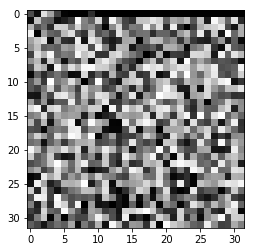

In [29]:
filename = 'ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa.exe'

file_size = os.path.getsize(filename)
h = get_largest_factor(file_size)
w = file_size / h

with open(filename, mode = 'rb') as f:
    d = np.fromfile(f, dtype = np.uint8, count = file_size).reshape(h, w)
    
print(d.shape)
    
PILimage = Image.fromarray(d)

image = PILimage.resize((32, 32), Image.NEAREST)  

image.save('result_1.jpg')

pix = np.array(image)
pix = pix.reshape(-1, 1)
print(pix.shape)

with open('malware_images.csv', mode = 'w') as f:
    f.write('hash' + ',')
    for i in range(pix.shape[0]):
        f.write(str(i) + ',')
    f.write('malware' + '\n')
    f.write(filename + ',')
    for i in range(pix.shape[0]):
        f.write(str(int(pix[i])) + ',')
    f.write('1' + '\n')

pix = np.array(image)
plt.imshow(pix, cmap = 'gray', vmin = 0, vmax = 255)

In [30]:
df = pd.read_csv('malware_images.csv')

In [31]:
df.head()

,hash,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,malware
0,ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439...,77,14,224,164,65,4,0,0,0,...,150,99,87,237,141,64,69,171,128,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 1026 entries, hash to malware
dtypes: int64(1025), object(1)
memory usage: 8.1+ KB


In [33]:
X = df.values[:, 1:1025].astype('uint8')

In [34]:
X.shape

(1, 1024)

In [35]:
X

array([[ 77,  14, 224, ...,  69, 171, 128]], dtype=uint8)

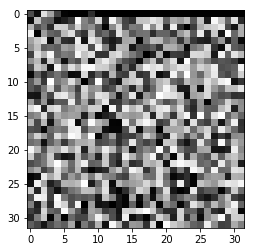

In [36]:
plt.imshow(X.reshape(32, 32), cmap = 'gray', vmin = 0, vmax = 255)

In [26]:
df = pd.read_csv('/home/angelo/Desktop/CNN_data/goodware_images.csv')

In [27]:
df.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,...,pix_1015,pix_1016,pix_1017,pix_1018,pix_1019,pix_1020,pix_1021,pix_1022,pix_1023,malware
0,0,21,0,0,0,18,0,0,0,83,...,221,121,190,4,13,35,36,49,228,0
1,199,15,104,0,0,80,255,251,69,102,...,48,49,49,64,180,57,58,12,204,0
2,2,115,115,132,0,0,0,10,125,169,...,121,0,101,115,0,101,0,0,0,0
3,145,255,255,255,123,255,106,255,108,255,...,0,0,0,0,0,0,0,0,0,0
4,46,8,255,137,240,117,120,83,116,131,...,5,175,180,130,130,7,13,175,159,0


In [28]:
df.drop(['malware'], axis = 1, inplace = True)

In [33]:
x = df.values[0, 0:1024].astype('uint8')

In [34]:
x.shape

(1024,)

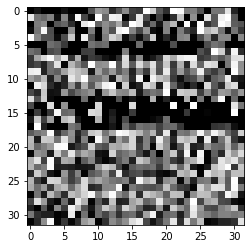

In [35]:
plt.imshow(x.reshape(32, 32), cmap = 'gray', vmin = 0, vmax = 255)